In [1]:
import numpy as np
import matplotlib.pyplot as plt

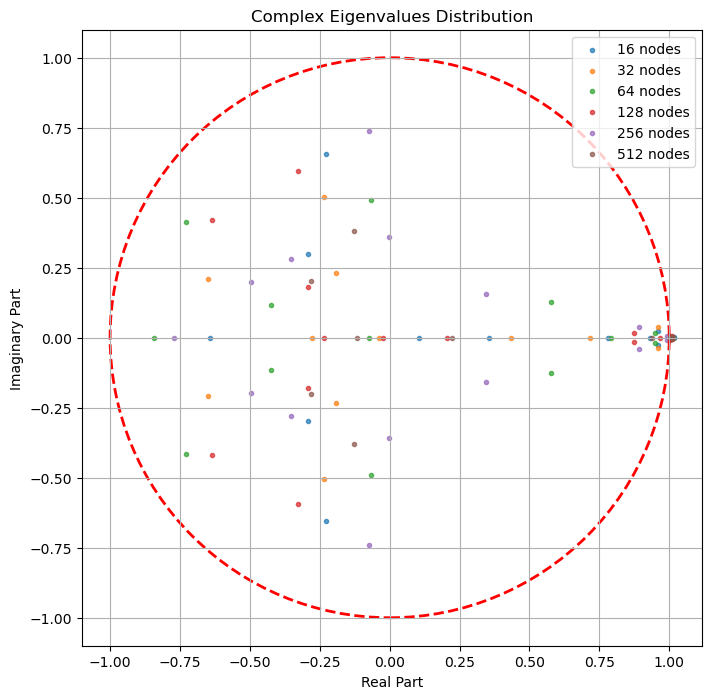

In [2]:
import numpy as np
import matplotlib.pyplot as plt

suffixes = ['_16node_16latent_1step', '_32node_16latent_1step', '_64node_16latent_1step', '_128node_16latent_1step', '_256node_16latent_1step', '_512node_16latent_1step']
# suffixes = ['_16node_16latent_1step', '_32node_16latent_1step']

eigenvalues_list = []

for suffix in suffixes:
    file_name = 'output/eigenvalues' + suffix + '.npy'
    eigenvalues = np.load(file_name)
    eigenvalues_list.append(eigenvalues)

plt.figure(figsize=(8, 8))

for i, eigenvalues in enumerate(eigenvalues_list):
    real_part = eigenvalues.real
    imaginary_part = eigenvalues.imag
    label = f'{16 * 2**i} nodes'
    plt.scatter(real_part, imaginary_part, marker='.', alpha=0.7, label=label)

unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='dashed', linewidth=2)
plt.gca().add_patch(unit_circle)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Complex Eigenvalues Distribution')

plt.grid(True)

plt.legend()

plt.show()

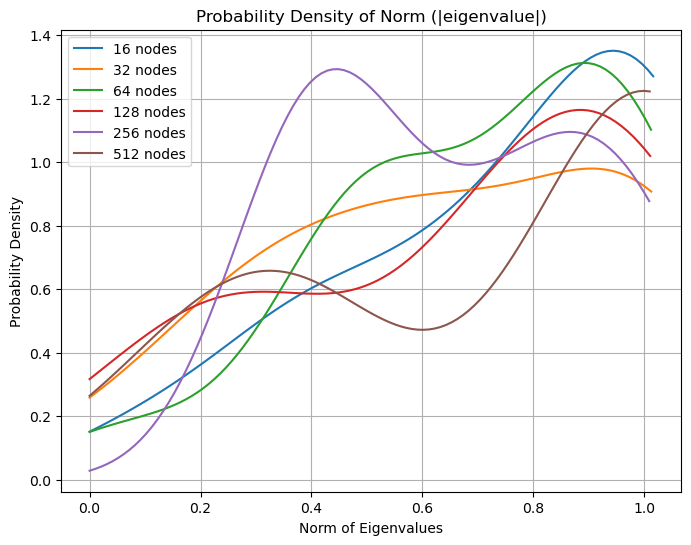

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Create a figure and plot the density-like curve for eigenvalue norms
plt.figure(figsize=(8, 6))

# Plot the density-like curve for eigenvalue norms for each dataset
for i, eigenvalues in enumerate(eigenvalues_list):
    norms = np.abs(eigenvalues)
    kde = gaussian_kde(norms)
    x = np.linspace(0, max(norms), 100)
    plt.plot(x, kde(x), label=f'{16 * 2**i} nodes')

plt.xlabel('Norm of Eigenvalues')
plt.ylabel('Probability Density')
plt.title('Probability Density of Norm (|eigenvalue|)')

plt.grid(True)
plt.legend()
plt.show()